<h1 style="color:purple;"> 
Swarovski &Guess jewalry
</h1>

### Appendix
- Click on the links:

>1.   <a href=#intro>Intro</a>
>2.   <a href=#imports>Impots</a>
>3.   <a href=#load>Load Data</a>
>4.   <a href=#Formating>Data Formating</a>
>5.   <a href=#EDA1>Exploratory Data Analysis(uin-variable)</a>
>6.   <a href=#split>Splitting Data</a>
>7.   <a href=#baseline>Baseline Modle</a>
>8.   <a href=#prep>Data Prep& Experimentions</a>




###   <a name='intro'>Domain Background:</a>

Amazon and also subscribed to Amazon.com is an e-commerce and cloud computing website founded on July 5, 1994, by Jeff Bezos and headquartered in Seattle, Washington. It is the largest online retailer in the world by area and market turnover. Amazon.com started as an online bookstore and later diversified into selling DVDs, Blu-rays, CDs, video downloads, streaming, audiobook downloads, software, games, toys, furniture, and jewelry.

###  <a name='intro'>Potential Prediction:</a>
Our linear regression model will make us able to predict the prices of Swarovski and Guess jewelry.

###   <a name='intro'>Data Description:</a>
Data will be scraped from the Amazon website from the jewelry section of the Swarovski and Guess brand. A sample of the features that will be used to determine our target are "brand", "rating", "price".


 ###  <a name='intro'>featuers:</a>
1.	brand: type of brand GUSEE or Swarovski
2.	j_type: description of jewelry
3.  rating: number of rating
4.  review_num: number of reviews
5.  price: price of jewelry


###   <a name='intro'>Tools:</a>
The main technologies and libraries that will be used are:

Technologies:
1.	Python
2.	Jupyter Notebook
3.	HTML/CS

Libraries:
1.	Pandas
2.	BeautifulSoup
3.	Matplotlib
4.	Seaborn
5.	Numpy 
6.	Sklearn



##   <a name='imports'>Libraries Imports:</a>

In [1]:
print ("Importing.....",end="",flush=True)

%pylab inline
%config InlineBackend.figure_formats = ['retina']
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")


Importing.....Populating the interactive namespace from numpy and matplotlib
[Done]


In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


 ##  <a name='load'>Load Data:</a>

In [3]:
df = pd.read_csv("jewelry_price.csv")
df.head()

,brand,j_type,rating_no_clean,rating,review_no_clean,review_num,price_no_clean,price
0,GUESS,Women's Necklace UBN29069,NaN,NaN,NaN,NaN,SAR 112.17,112.17
1,GUESS,3 Piece Tension Id Bangle Bracelet,4.2 out of 5 stars,4.2,232,232.0,SAR 110.80,110.80
2,GUESS,95364-21,4.3 out of 5 stars,4.3,191,191.0,SAR 68.04,68.04
3,GUESS,Ladies Bracelet UBB20099-L,NaN,NaN,NaN,NaN,SAR 127.00,127.00
4,Swarovski,Sparkling Dance Dial Up Ring,NaN,NaN,NaN,NaN,SAR 161.93,161.93


##  <a name='Formating'>Data Formating</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            912 non-null    object 
 1   j_type           912 non-null    object 
 2   rating_no_clean  394 non-null    object 
 3   rating           394 non-null    float64
 4   review_no_clean  395 non-null    object 
 5   review_num       395 non-null    float64
 6   price_no_clean   837 non-null    object 
 7   price            837 non-null    float64
dtypes: float64(3), object(5)
memory usage: 57.1+ KB


In [5]:
#We don't need the columns rating and review_num,price so we'll drop them 
df.drop(columns=['rating_no_clean', 'review_no_clean','price_no_clean'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       912 non-null    object 
 1   j_type      912 non-null    object 
 2   rating      394 non-null    float64
 3   review_num  395 non-null    float64
 4   price       837 non-null    float64
dtypes: float64(3), object(2)
memory usage: 35.8+ KB


In [7]:
df[df.duplicated()].head(10)

,brand,j_type,rating,review_num,price
249,GUESS,Slider and Hinge Bangle Bracelet Set with Glas...,NaN,NaN,125.69
432,GUESS,Quatro G Drop,3.0,1.0,100.15
433,GUESS,Museum Hoop,NaN,NaN,108.07
434,GUESS,Butterfly linear earring,5.0,1.0,106.60
435,GUESS,Quatro G Drop,3.8,3.0,98.16
436,GUESS,Stone ring drop Earring,NaN,NaN,119.50
437,GUESS,3 on mixed hoop set,NaN,NaN,121.50
438,GUESS,Logo post Hoop,NaN,NaN,102.51
439,GUESS,Wide Bypass Band with Faux Python,NaN,NaN,73.40
440,GUESS,Wide Bypass Band with Glitter Paper,NaN,NaN,73.03


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df[df.duplicated()]

,brand,j_type,rating,review_num,price


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       862 non-null    object 
 1   j_type      862 non-null    object 
 2   rating      383 non-null    float64
 3   review_num  384 non-null    float64
 4   price       789 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [11]:
df["j_type"] = df["j_type"].str.lower() 


df["Type"] = pd.np.where(df.j_type.str.contains("earrings"), "Earrings",
                               pd.np.where(df.j_type.str.contains("bangle"), "Bangle",
                               pd.np.where(df.j_type.str.contains("pendant"), "Pendant",
                               pd.np.where(df.j_type.str.contains("necklace"), "Necklace",
                               pd.np.where(df.j_type.str.contains("ring"), "Ring",            
                               pd.np.where(df.j_type.str.contains("bracelet"), "Bracelet", "Others"))))))

df.head(10)

,brand,j_type,rating,review_num,price,Type
0,GUESS,women's necklace ubn29069,NaN,NaN,112.17,Necklace
1,GUESS,3 piece tension id bangle bracelet,4.2,232.0,110.80,Bangle
2,GUESS,95364-21,4.3,191.0,68.04,Others
3,GUESS,ladies bracelet ubb20099-l,NaN,NaN,127.00,Bracelet
4,Swarovski,sparkling dance dial up ring,NaN,NaN,161.93,Ring
5,Swarovski,crystal facet white swan rose gold-plated earr...,4.8,6.0,261.40,Earrings
6,GUESS,5 piece mixed chain every day bracelet set wit...,NaN,NaN,130.06,Bracelet
7,GUESS,jewellery dream & love necklace ubn70048,NaN,NaN,103.00,Necklace
8,Swarovski,cosmic rock bangle mb jet/blk/pbk,NaN,2.0,1484.78,Bangle
9,GUESS,ube70104 earrings ube70104,NaN,NaN,NaN,Earrings


In [12]:
for col in df.columns.to_list():
    num_uniq = df[col].nunique()
    if num_uniq <= 10:
        uniq_list = df[col].unique()
    else:
        uniq_list = "more than 10"
    print(col, ":", num_uniq, ",", uniq_list)

brand : 2 , ['GUESS' 'Swarovski']
j_type : 816 , more than 10
rating : 28 , more than 10
review_num : 115 , more than 10
price : 698 , more than 10
Type : 7 , ['Necklace' 'Bangle' 'Others' 'Bracelet' 'Ring' 'Earrings' 'Pendant']


In [13]:
df=df.dropna(subset = ['price'])

In [14]:
df.isna().sum()

brand           0
j_type          0
rating        461
review_num    460
price           0
Type            0
dtype: int64

In [15]:
selected_columns = ["brand","Type","rating","review_num","price"]
jewalary = df[selected_columns].copy()
jewalary

,brand,Type,rating,review_num,price
0,GUESS,Necklace,NaN,NaN,112.17
1,GUESS,Bangle,4.2,232.0,110.80
2,GUESS,Others,4.3,191.0,68.04
3,GUESS,Bracelet,NaN,NaN,127.00
4,Swarovski,Ring,NaN,NaN,161.93
...,...,...,...,...,...
907,GUESS,Earrings,4.4,43.0,73.74
908,GUESS,Necklace,NaN,NaN,349.01
909,GUESS,Bracelet,5.0,1.0,197.42
910,GUESS,Earrings,5.0,2.0,102.72


In [16]:
jewalary = pd.get_dummies(jewalary,drop_first=True)
jewalary.head()

,rating,review_num,price,brand_Swarovski,Type_Bracelet,Type_Earrings,Type_Necklace,Type_Others,Type_Pendant,Type_Ring
0,NaN,NaN,112.17,0,0,0,1,0,0,0
1,4.2,232.0,110.80,0,0,0,0,0,0,0
2,4.3,191.0,68.04,0,0,0,0,1,0,0
3,NaN,NaN,127.00,0,1,0,0,0,0,0
4,NaN,NaN,161.93,1,0,0,0,0,0,1


##  <a name='EDA1'>Exploratory Data Analysis</a>

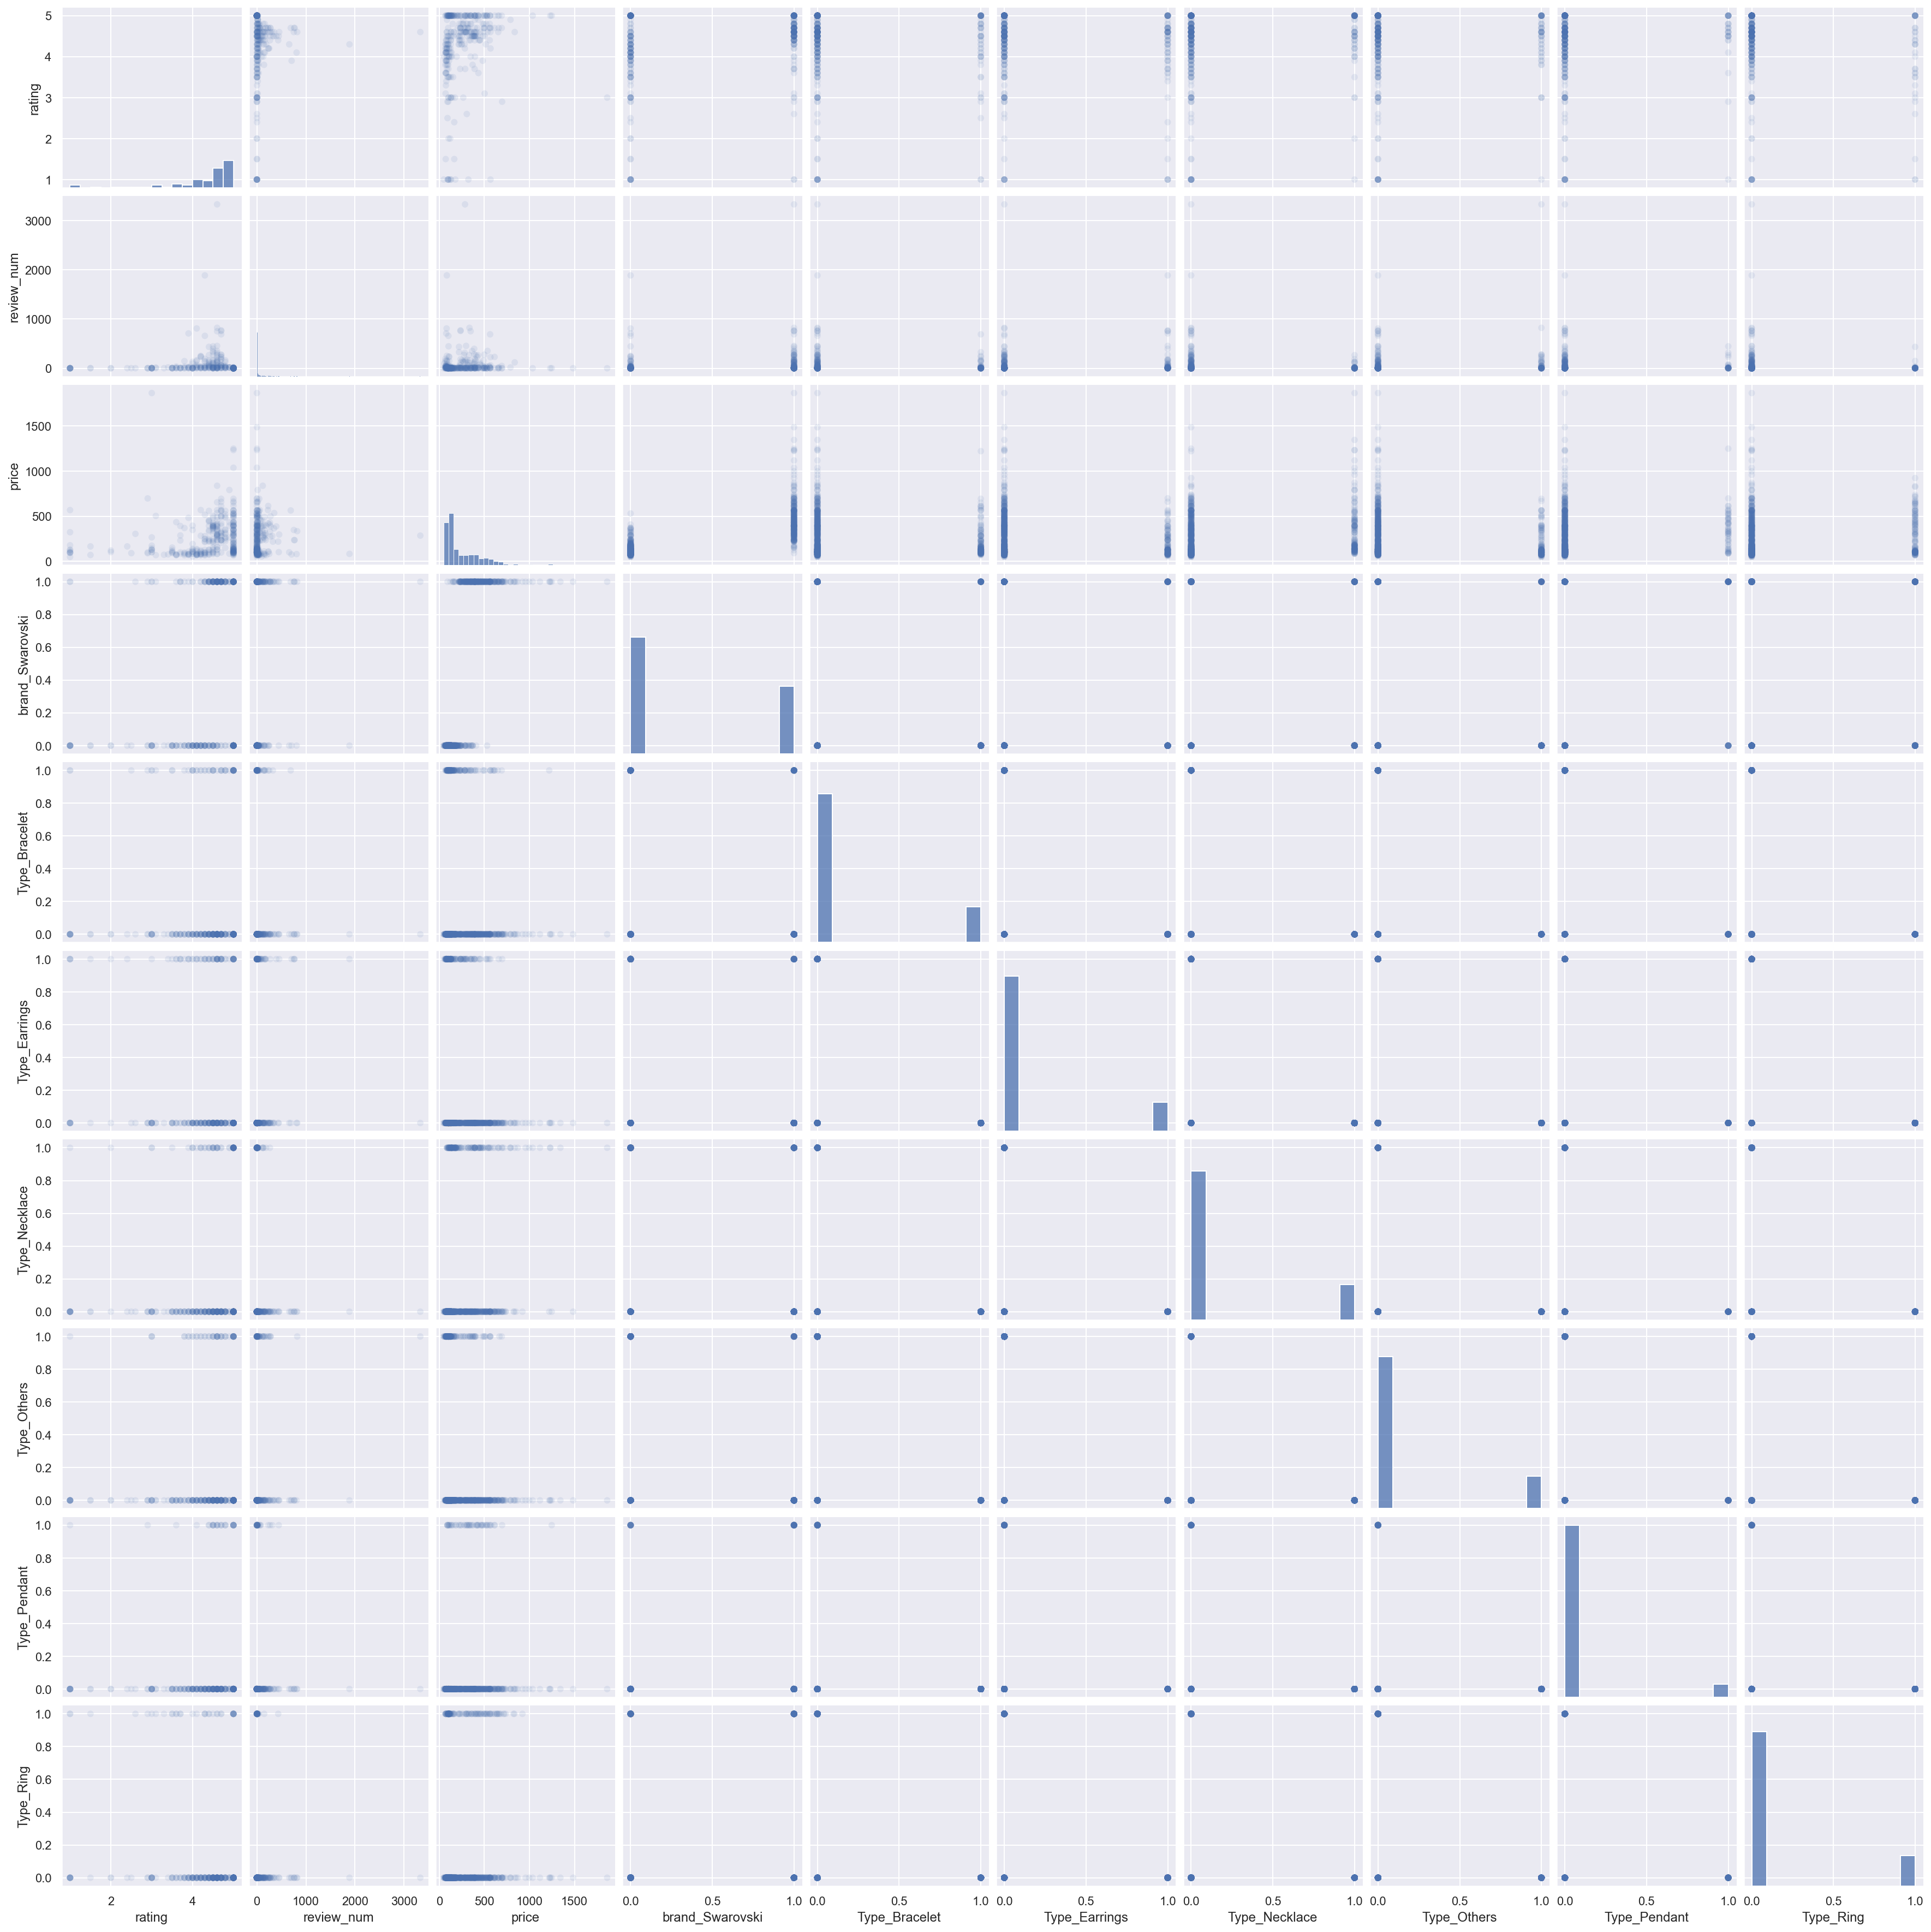

In [17]:
sns.pairplot(jewalary[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [18]:
corr_matrix = jewalary.corr()
corr_matrix

,rating,review_num,price,brand_Swarovski,Type_Bracelet,Type_Earrings,Type_Necklace,Type_Others,Type_Pendant,Type_Ring
rating,1.000000,0.048209,0.210392,0.267653,-0.017680,-0.097960,0.108523,0.054958,0.066120,-0.134284
review_num,0.048209,1.000000,-0.005354,0.114030,-0.043957,0.073857,-0.102656,0.106434,-0.026740,-0.075110
price,0.210392,-0.005354,1.000000,0.757497,-0.125102,-0.121432,0.188794,-0.161366,0.121568,0.079313
brand_Swarovski,0.267653,0.114030,0.757497,1.000000,-0.139098,-0.028396,0.060869,-0.152426,0.162941,0.122010
Type_Bracelet,-0.017680,-0.043957,-0.125102,-0.139098,1.000000,-0.211945,-0.238619,-0.225893,-0.133717,-0.216961
Type_Earrings,-0.097960,0.073857,-0.121432,-0.028396,-0.211945,1.000000,-0.211945,-0.200642,-0.118769,-0.192708
Type_Necklace,0.108523,-0.102656,0.188794,0.060869,-0.238619,-0.211945,1.000000,-0.225893,-0.133717,-0.216961
Type_Others,0.054958,0.106434,-0.161366,-0.152426,-0.225893,-0.200642,-0.225893,1.000000,-0.126586,-0.205390
Type_Pendant,0.066120,-0.026740,0.121568,0.162941,-0.133717,-0.118769,-0.133717,-0.126586,1.000000,-0.121580
Type_Ring,-0.134284,-0.075110,0.079313,0.122010,-0.216961,-0.192708,-0.216961,-0.205390,-0.121580,1.000000


<AxesSubplot:>

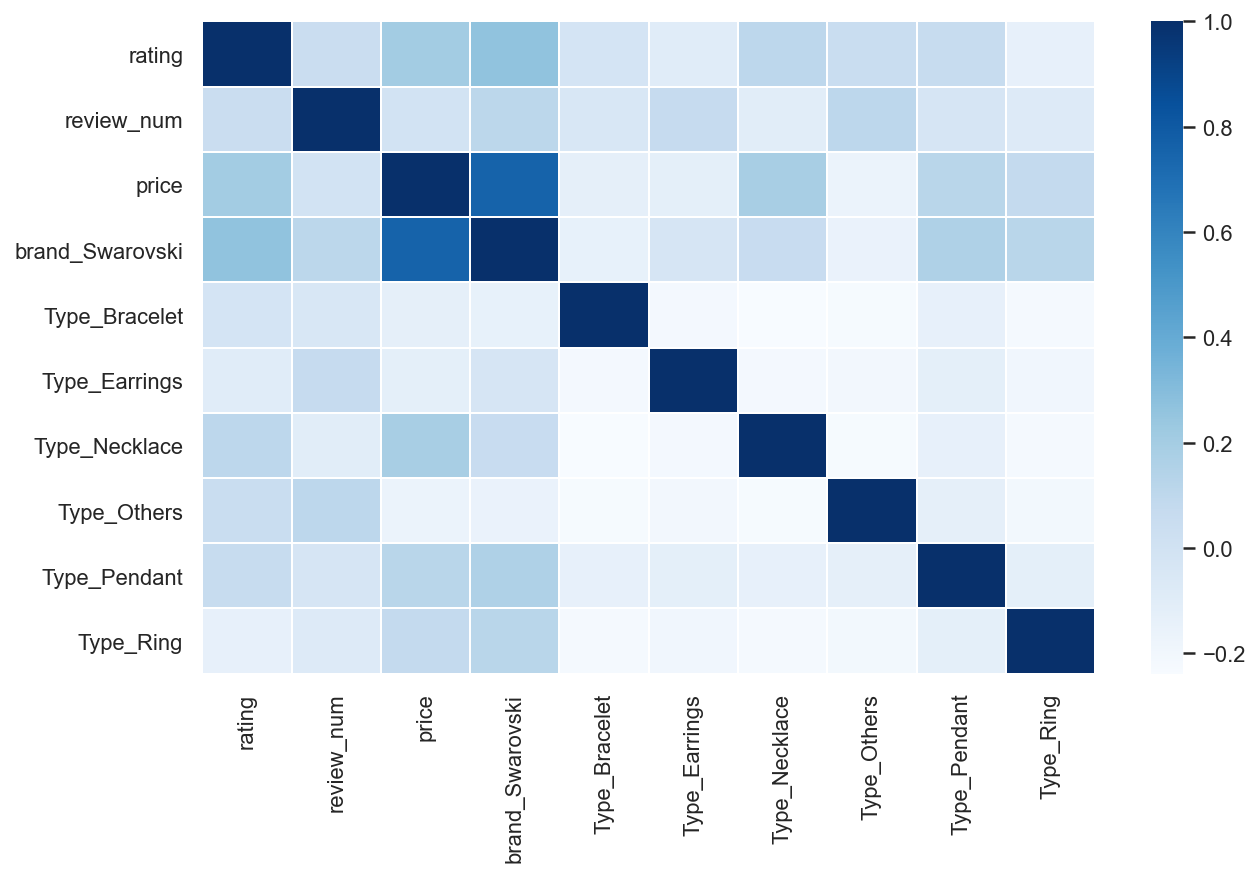

In [19]:
plt.figure(figsize=(10,6))
#sns.heatmap(corr_matrix)
sns.heatmap(corr_matrix,linewidths=.5, cmap="Blues")  #""  YlGnBu

#  <a name='split'>Splitting Data</a>

In [20]:
#split data to x,y
X,y = jewalary.drop("price",axis=1),jewalary["price"]
#split data to train set and test set
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#split train set to train and validation set
X_train,X_val,y_train,y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=10)

In [21]:
from sklearn.impute import SimpleImputer              #imput null value in train set by mean
imputer = SimpleImputer(strategy="mean")

imputer.fit(X_train)
imputer.statistics_

array([ 4.3455814 , 78.4212963 ,  0.35714286,  0.19642857,  0.16269841,
        0.20634921,  0.1547619 ,  0.07936508,  0.1547619 ])

In [22]:
z = imputer.transform(X_train)
X_train = pd.DataFrame(z, columns = X_train.columns,index=X_train.index )
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 187 to 26
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           504 non-null    float64
 1   review_num       504 non-null    float64
 2   brand_Swarovski  504 non-null    float64
 3   Type_Bracelet    504 non-null    float64
 4   Type_Earrings    504 non-null    float64
 5   Type_Necklace    504 non-null    float64
 6   Type_Others      504 non-null    float64
 7   Type_Pendant     504 non-null    float64
 8   Type_Ring        504 non-null    float64
dtypes: float64(9)
memory usage: 39.4 KB


In [23]:
imputer.fit(X_val)                       ##imput null value in val set by mean
imputer.statistics_

array([4.30196078e+00, 8.09411765e+01, 3.46456693e-01, 1.88976378e-01,
       1.57480315e-01, 1.81102362e-01, 2.28346457e-01, 5.51181102e-02,
       1.65354331e-01])

In [24]:
n = imputer.transform(X_val)
X_val = pd.DataFrame(n, columns = X_val.columns,index=X_val.index )
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 421 to 835
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           127 non-null    float64
 1   review_num       127 non-null    float64
 2   brand_Swarovski  127 non-null    float64
 3   Type_Bracelet    127 non-null    float64
 4   Type_Earrings    127 non-null    float64
 5   Type_Necklace    127 non-null    float64
 6   Type_Others      127 non-null    float64
 7   Type_Pendant     127 non-null    float64
 8   Type_Ring        127 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [25]:
m = imputer.transform(X_test)             ##imput null value in test set by mean

In [26]:
X_test = pd.DataFrame(m, columns = X_test.columns,index=X_test.index )
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 128 to 36
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           158 non-null    float64
 1   review_num       158 non-null    float64
 2   brand_Swarovski  158 non-null    float64
 3   Type_Bracelet    158 non-null    float64
 4   Type_Earrings    158 non-null    float64
 5   Type_Necklace    158 non-null    float64
 6   Type_Others      158 non-null    float64
 7   Type_Pendant     158 non-null    float64
 8   Type_Ring        158 non-null    float64
dtypes: float64(9)
memory usage: 12.3 KB


#  <a name='baseline'>Baseline Modle</a>

In [27]:
lm = LinearRegression()
x1 = lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.6151318647639381

In [28]:
lm.score(X_val, y_val)

0.6038689896105733

#  <a name='prep'>Data Prep & Experimentions</a>

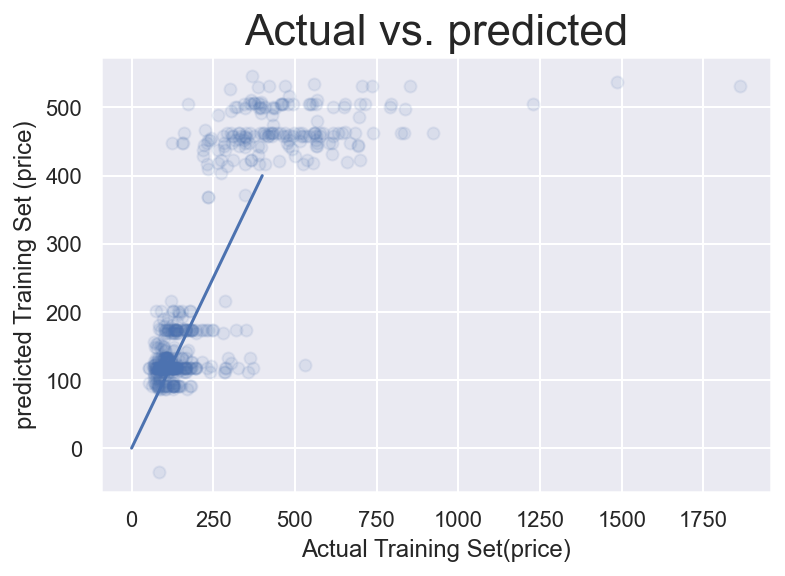

In [29]:
# Actual Training Set(x) vs. predicted Training Set(y)
y_train_pred = lm.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.1)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set(price)', size=12)
plt.ylabel('predicted Training Set (price)', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

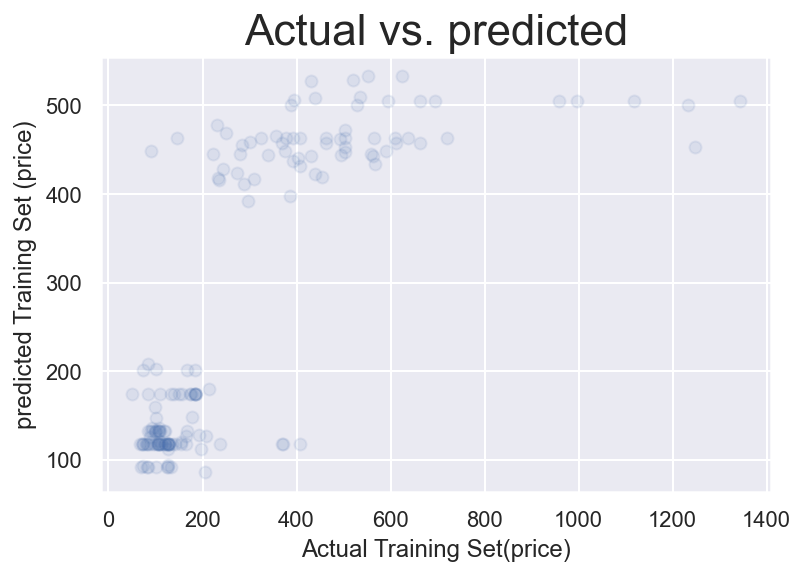

In [30]:
# Actual Test Set(x) vs. predicted Test Set(y)
y_test_pred = lm.predict(X_test)#cross valid do train only 

plt.scatter(y_test, y_test_pred, alpha=0.1)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set(price)', size=12)
plt.ylabel('predicted Training Set (price)', size=12)
plt.show()

### Experment1

In [31]:
# Expr1 (log expr)

lm = LinearRegression()
log_expr = lm.fit(X_train,np.log(y_train))
lm.score(X_train,np.log (y_train))

0.7474074663784718

In [32]:
lm.score(X_val, np.log (y_val))

0.7425895112436542

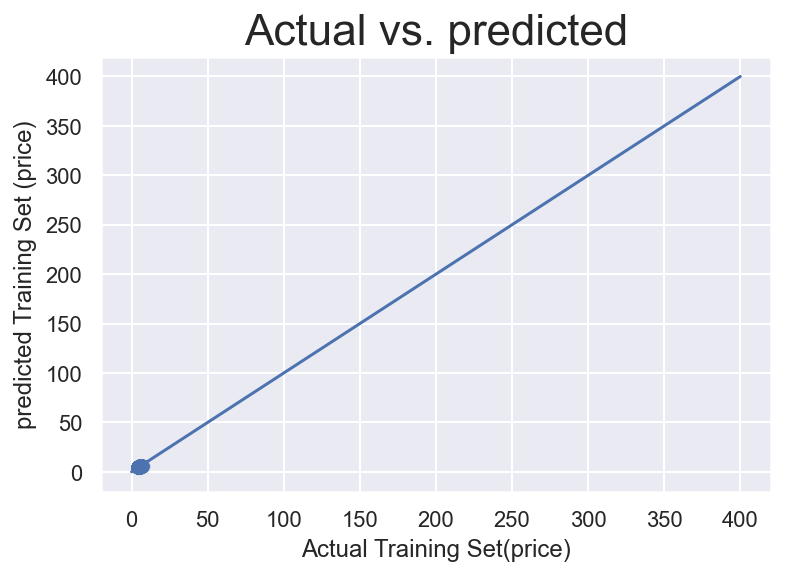

In [33]:
# Actual Training Set(x) vs. predicted Training Set(y)
y_train_pred = log_expr.predict(X_train)

plt.scatter(np.log(y_train), y_train_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set(price)', size=12)
plt.ylabel('predicted Training Set (price)', size=12)
plt.plot([0, 400], [0, 400])
plt.show()

### Experment2

In [34]:
from sklearn.preprocessing import StandardScaler
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [35]:
## Scale the Predictors on both the train and val set
X_tr = std.transform(X_train.values)
X_vl = std.transform(X_val.values)

In [36]:
# Expr (lasso expr)
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_tr,y_train)
lasso_model.score(X_tr,y_train)

0.6139889142480219

In [37]:
lasso_model.score(X_vl,y_val)

0.6037872297089044

### Experment3

In [38]:
# Expr (ridge expr)
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_tr, y_train)
lr_model_ridge.score(X_tr,(y_train))

0.6151230169656787

In [39]:
lr_model_ridge.score(X_vl,(y_val))

0.6039037698633265

### Experment4

In [40]:
def linear_reg_kfold(X_train, y_train):
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train,y_train), 6)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score:{round(np.mean(valid_scores), 6)}")
    return lm

In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)

In [42]:
#using poly with PolynomialFeatures = 2
pf = PolynomialFeatures(2)

X_train_poly = pf.fit_transform(X_train)
linear_reg_kfold(X_train_poly, np.log(y_train))

Training Score: 0.768554
Validation Mean Score:-1.700513


LinearRegression()

In [43]:
#using poly with PolynomialFeatures = 3
pf = PolynomialFeatures(3)

X_train_poly = pf.fit_transform(X_train)
exp2 = linear_reg_kfold(X_train_poly, np.log(y_train))

Training Score: 0.799841
Validation Mean Score:-4986.084466


### ----------------------------------------------------------------------------------------------------------------

In [45]:
# Create your feature matrix (X) and target vector (y)
X_train,y_train = patsy.dmatrices('price ~ rating + review_num + brand_Swarovski + Type_Bracelet + Type_Earrings + Type_Necklace  + Type_Others +Type_Pendant+ Type_Ring   ', data=jewalary, return_type="dataframe")

# Create your model
model = sm.OLS(X_train,y_train)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     40.69
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           6.43e-48
Time:                        00:16:32   Log-Likelihood:                -2092.2
No. Observations:                 328   AIC:                             4204.
Df Residuals:                     318   BIC:                             4242.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         147.9048     56.035      2.640      0.009      37.659     258.151
rating             -1.1832      9.580     -0.124      0.902     -20.030      17.664
review_num         -0.0567      0.033     -1.706      0.089      -0.122       0.009
brand_Swarovski   289.1003     16.796     17.212      0.000     256.054     322.147
Type_Bracelet     -31.6289     42.444     -0.745      0.457    -115.135      51.878
Type_Earrings     -52.3545     41.133     -1.273      0.204    -133.282      28.573
Type_Necklace      52.7143     41.973      1.256      0.210     -29.866     135.295
Type_Others       -15.9654     42.423     -0.376      0.707     -99.430      67.499
Type_Pendant       20.6891     45.720      0.453      0.651     -69.263     110.641
Type_Ring         -55.2893     44.823     -1.233      0.218    -143.477      32.898
==============================================================================
Omnibus:                      326.370   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13653.734
Skew:                           4.087   Prob(JB):                         0.00
Kurtosis:                      33.533   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
j1 = jewalary.copy()
j1['log_price']=np.log(j1.price)

In [47]:
lm1 = smf.ols('log_price ~ rating + review_num + brand_Swarovski + Type_Bracelet + Type_Earrings + Type_Necklace  + Type_Others +Type_Pendant+ Type_Ring',data=j1)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     107.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.64e-91
Time:                        00:16:32   Log-Likelihood:                -131.59
No. Observations:                 328   AIC:                             283.2
Df Residuals:                     318   BIC:                             321.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6225      0.142     32.538      0.000       4.343       4.902
rating              0.0408      0.024      1.679      0.094      -0.007       0.089
review_num         -0.0002   8.43e-05     -2.162      0.031      -0.000   -1.64e-05
brand_Swarovski     1.1955      0.043     28.074      0.000       1.112       1.279
Type_Bracelet      -0.0480      0.108     -0.446      0.656      -0.260       0.164
Type_Earrings      -0.1634      0.104     -1.567      0.118      -0.369       0.042
Type_Necklace       0.1266      0.106      1.189      0.235      -0.083       0.336
Type_Others        -0.0760      0.108     -0.707      0.480      -0.288       0.136
Type_Pendant        0.0765      0.116      0.660      0.510      -0.152       0.305
Type_Ring          -0.2111      0.114     -1.857      0.064      -0.435       0.013
==============================================================================
Omnibus:                       40.416   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.347
Skew:                           0.794   Prob(JB):                     1.30e-13
Kurtosis:                       4.349   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
lm1 = smf.ols('log_price ~ rating + review_num + brand_Swarovski + Type_Bracelet + Type_Earrings + Type_Necklace  + Type_Others +Type_Pendant+ Type_Ring',data=j1)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     107.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.64e-91
Time:                        00:19:41   Log-Likelihood:                -131.59
No. Observations:                 328   AIC:                             283.2
Df Residuals:                     318   BIC:                             321.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6225      0.142     32.538      0.000       4.343       4.902
rating              0.0408      0.024      1.679      0.094      -0.007       0.089
review_num         -0.0002   8.43e-05     -2.162      0.031      -0.000   -1.64e-05
brand_Swarovski     1.1955      0.043     28.074      0.000       1.112       1.279
Type_Bracelet      -0.0480      0.108     -0.446      0.656      -0.260       0.164
Type_Earrings      -0.1634      0.104     -1.567      0.118      -0.369       0.042
Type_Necklace       0.1266      0.106      1.189      0.235      -0.083       0.336
Type_Others        -0.0760      0.108     -0.707      0.480      -0.288       0.136
Type_Pendant        0.0765      0.116      0.660      0.510      -0.152       0.305
Type_Ring          -0.2111      0.114     -1.857      0.064      -0.435       0.013
==============================================================================
Omnibus:                       40.416   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.347
Skew:                           0.794   Prob(JB):                     1.30e-13
Kurtosis:                       4.349   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""